# Gas turbines(problem statment)

The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.



Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.



Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

Variable (Abbr.) Unit Min Max Mean
Ambient temperature (AT) C â€“6.23 37.10 17.71
Ambient pressure (AP) mbar 985.85 1036.56 1013.07
Ambient humidity (AH) (%) 24.08 100.20 77.87
Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
Turbine after temperature (TAT) C 511.04 550.61 546.16
Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
Turbine energy yield (TEY) MWH 100.02 179.50 133.51
Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [3]:
data =pd.read_csv(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 16_ Neural Networks\gas_turbines.csv",encoding='latin1')
data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# EDA

In [4]:
data.shape

(15039, 11)

In [5]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
data[data.duplicated()]

Empty DataFrame
Columns: [AT, AP, AH, AFDP, GTEP, TIT, TAT, TEY, CDP, CO, NOX]
Index: []

In [7]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [8]:
data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

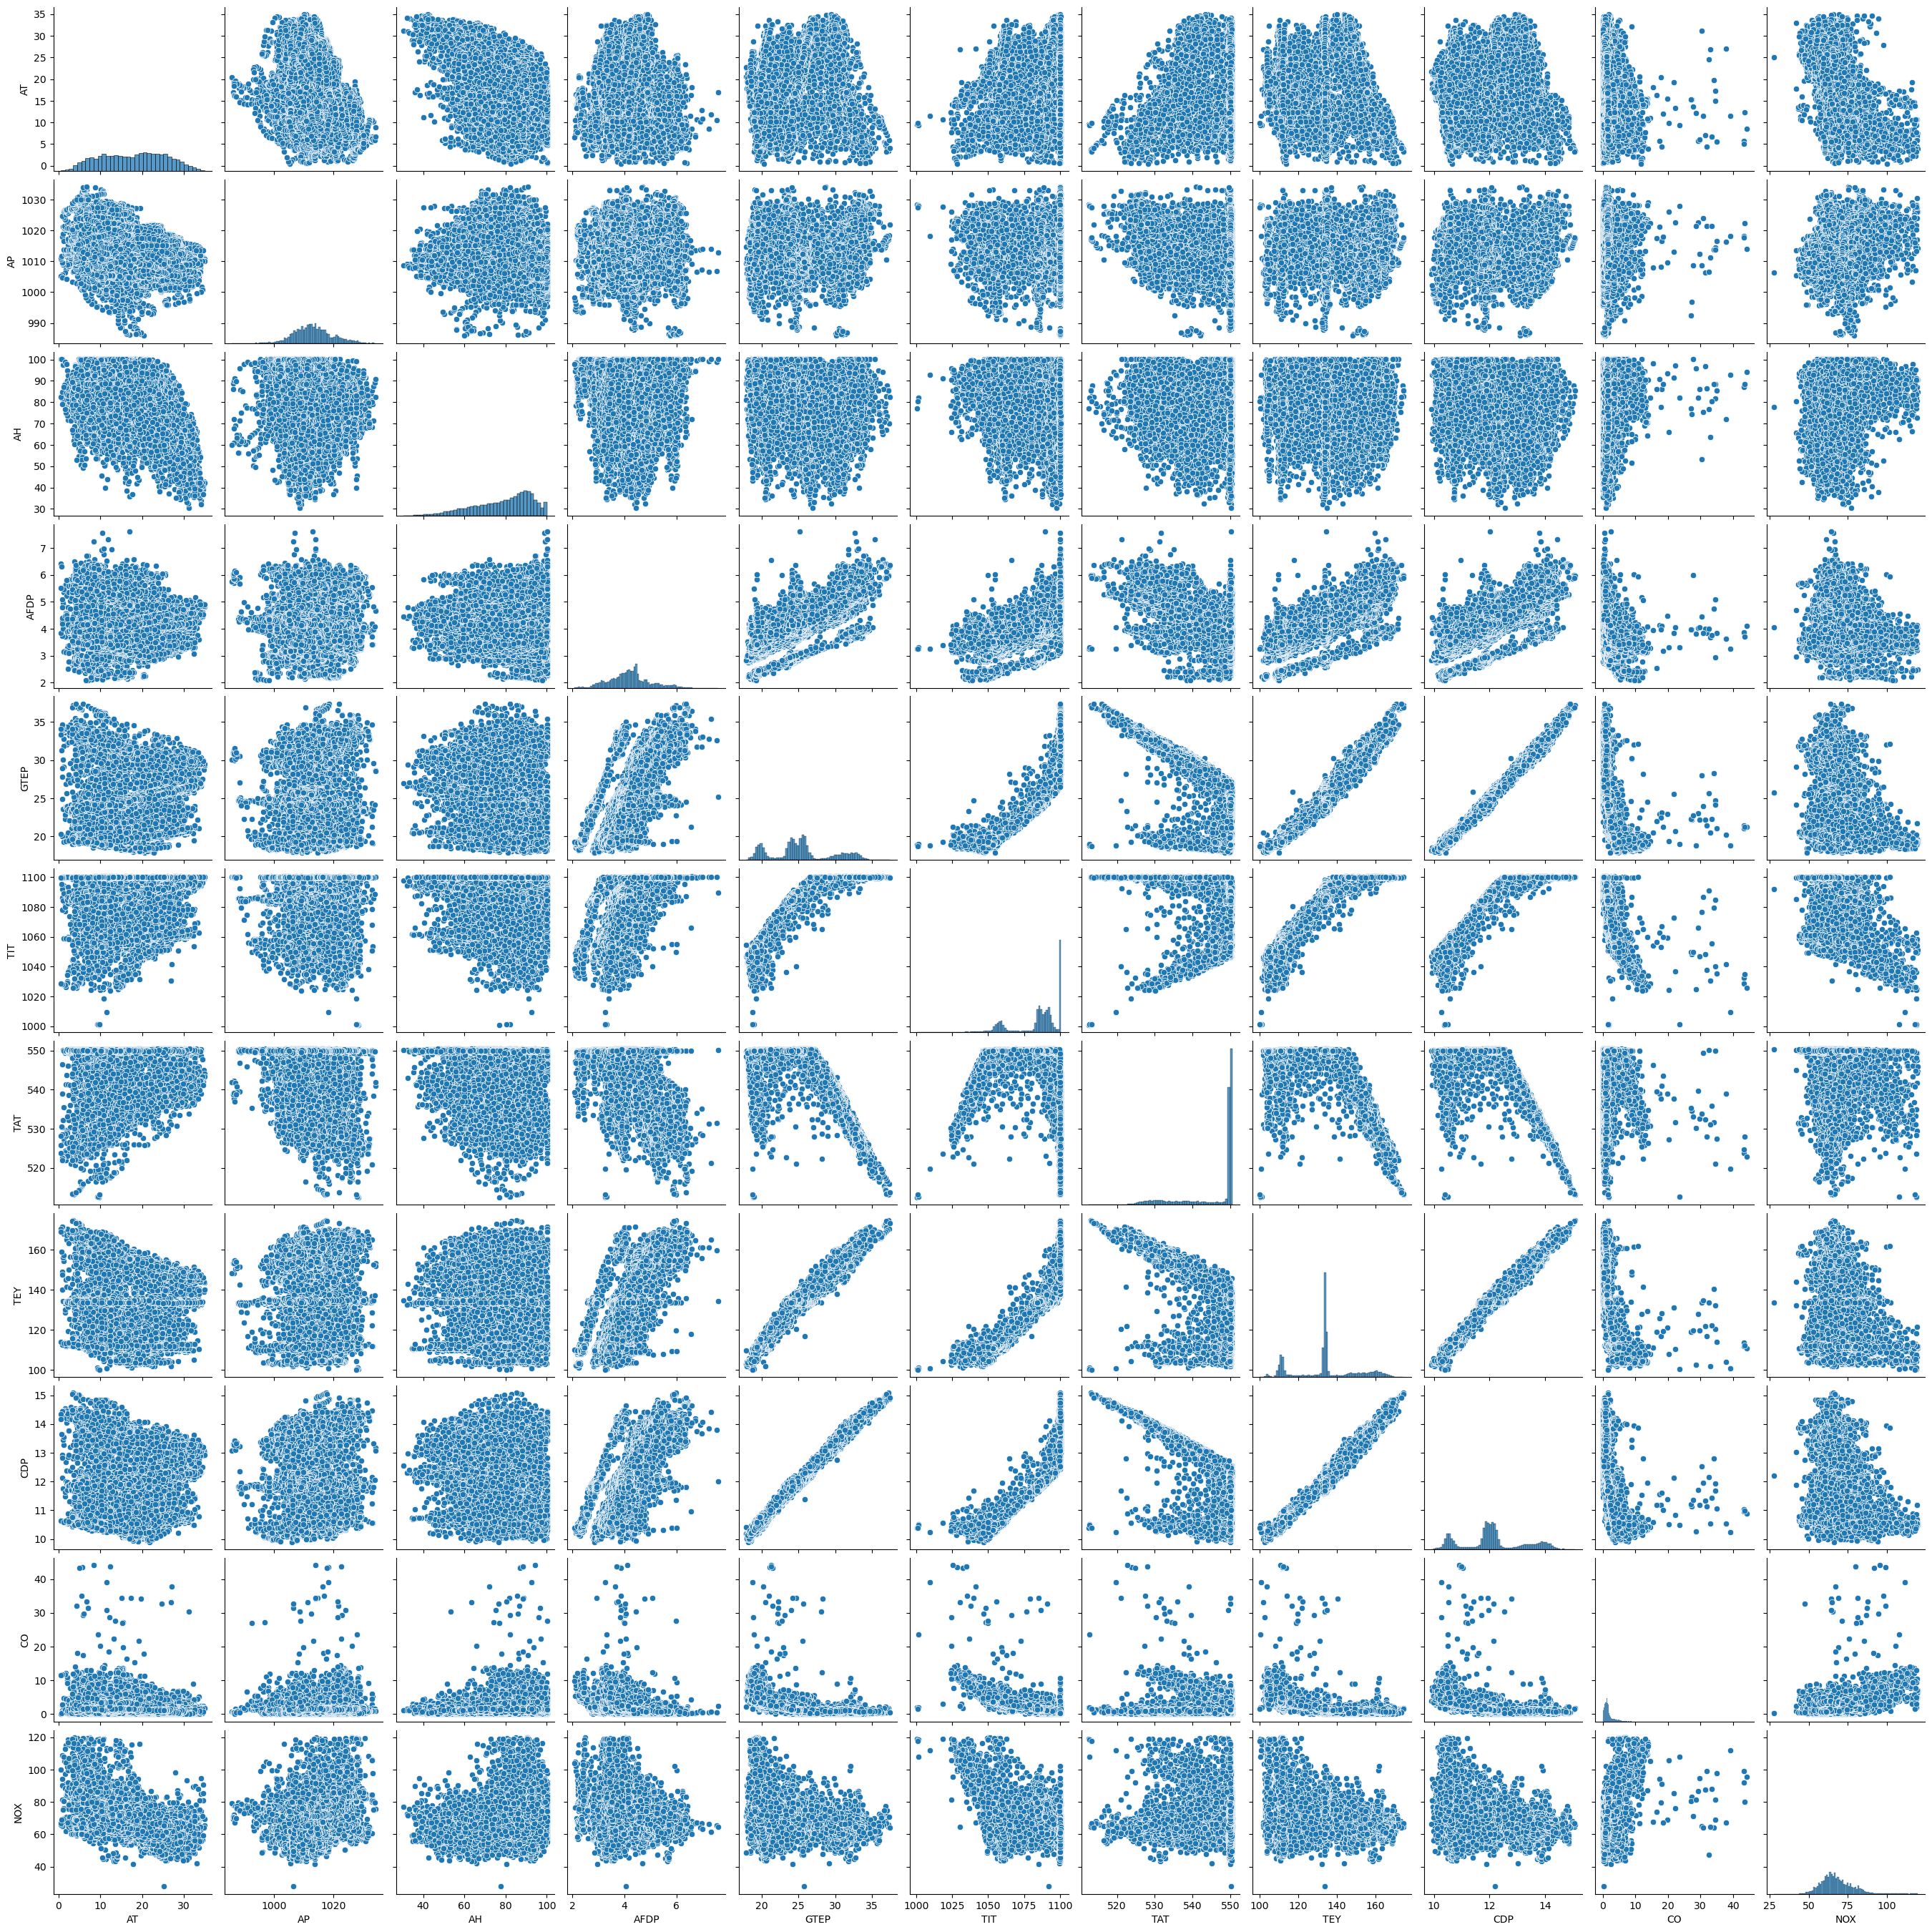

In [9]:
sns.pairplot(data)

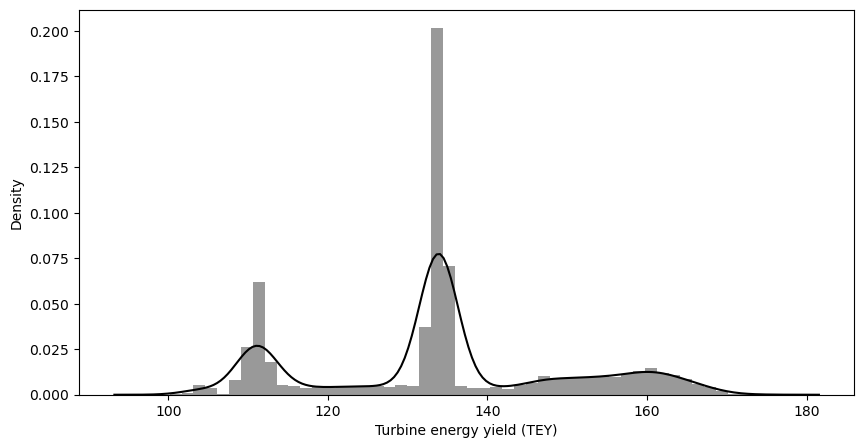

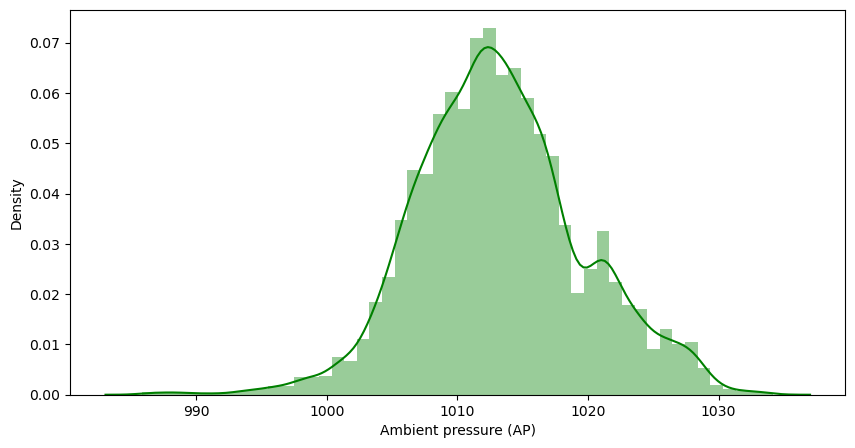

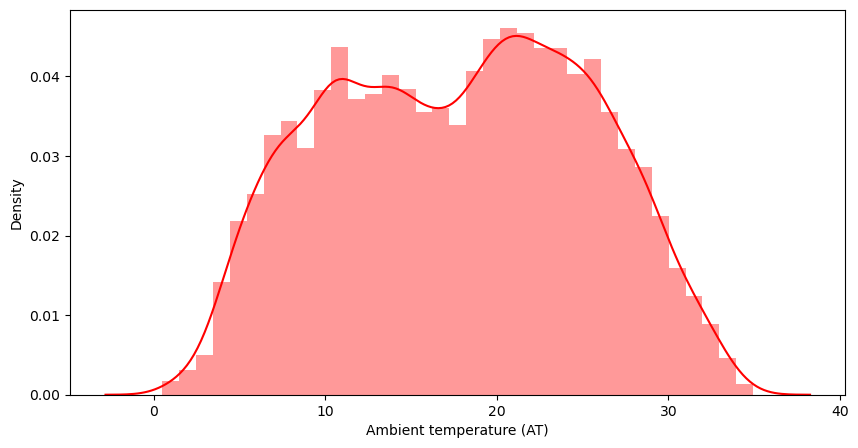

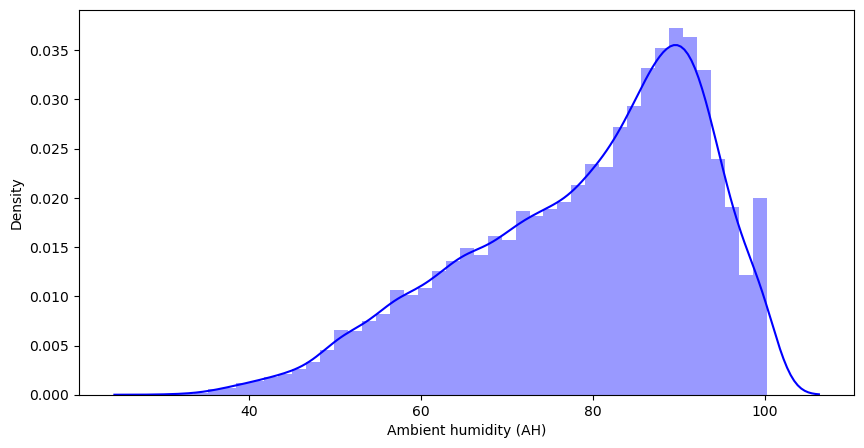

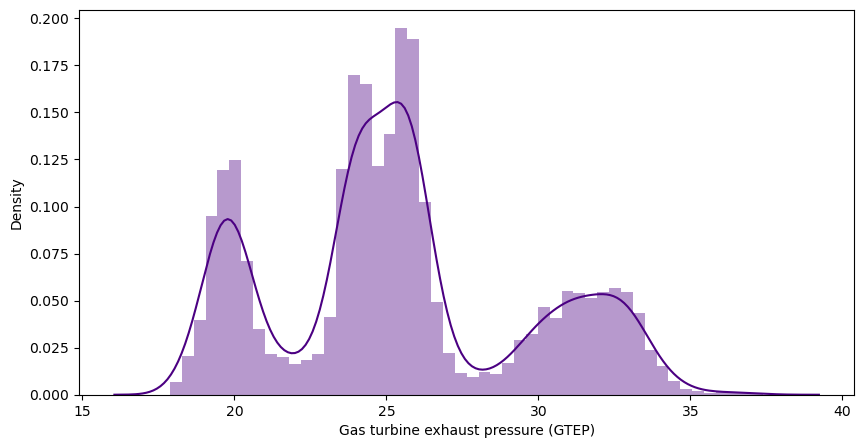

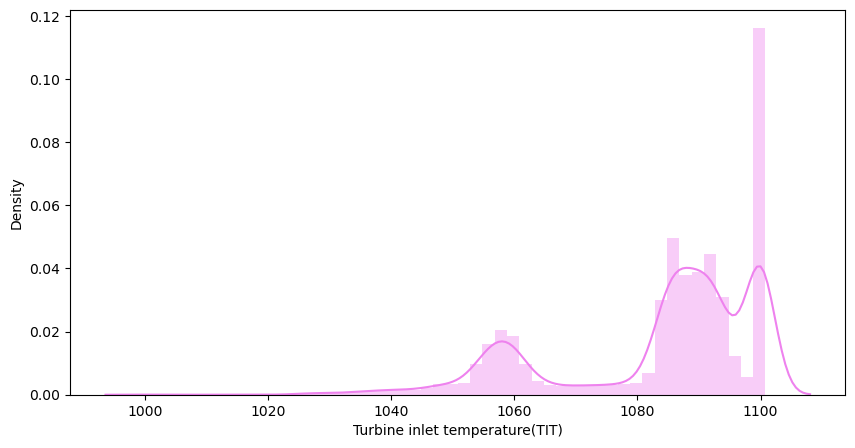

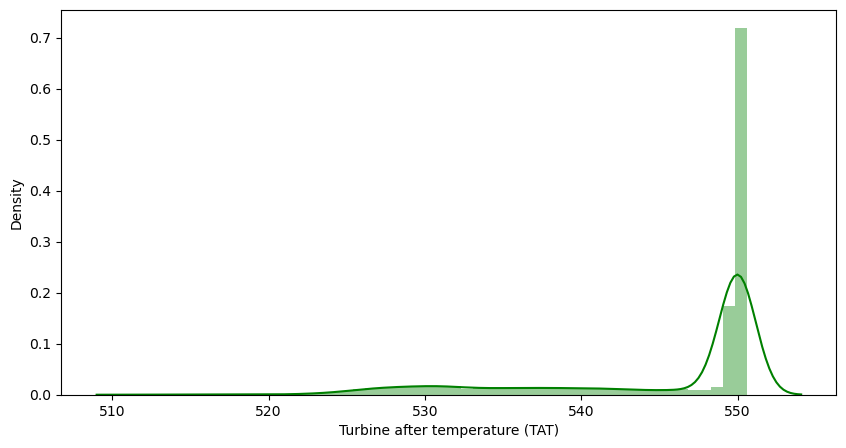

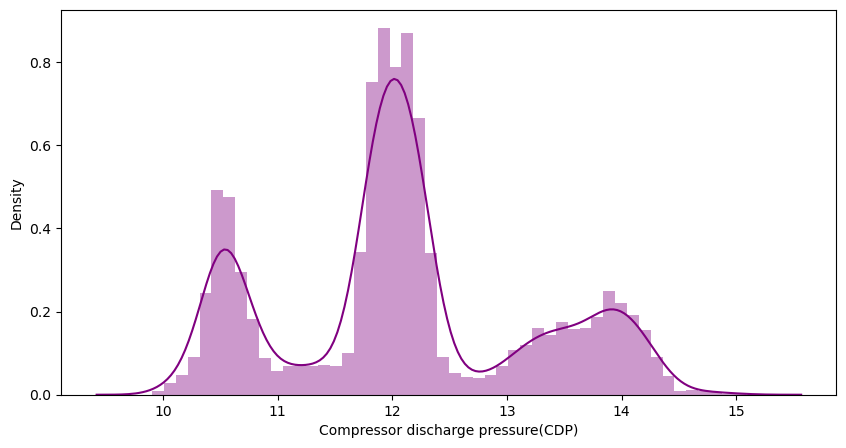

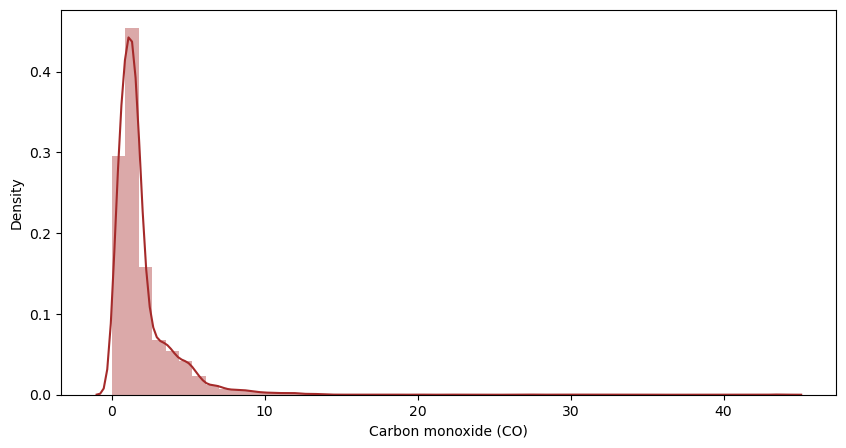

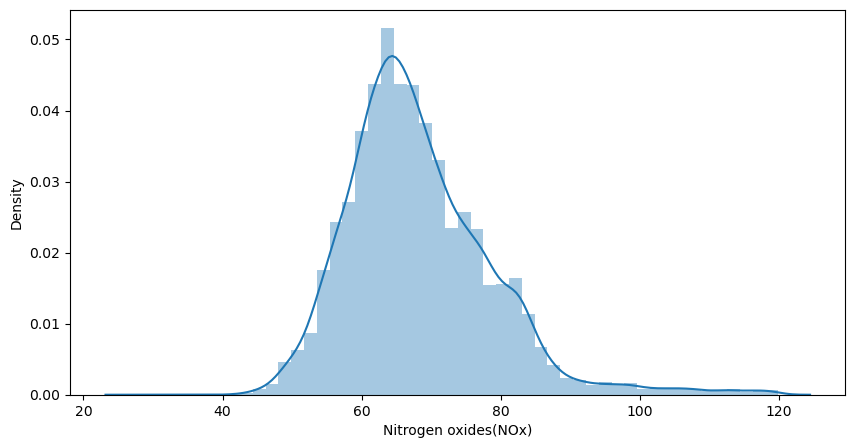

In [10]:
plt.figure(figsize=(10,5))
sns.distplot(x = data['TEY'],axlabel='Turbine energy yield (TEY)',color='black')

plt.figure(figsize=(10,5))
sns.distplot(x = data['AP'],axlabel='Ambient pressure (AP)',color='green')

plt.figure(figsize=(10,5))
sns.distplot(x = data['AT'],axlabel='Ambient temperature (AT)',color='red')

plt.figure(figsize=(10,5))
sns.distplot(x = data['AH'],axlabel='Ambient humidity (AH)',color='blue')

plt.figure(figsize=(10,5))
sns.distplot(x = data['GTEP'],axlabel='Gas turbine exhaust pressure (GTEP)',color='indigo')

plt.figure(figsize=(10,5))
sns.distplot(x = data['TIT'],axlabel='Turbine inlet temperature(TIT)',color='violet')

plt.figure(figsize=(10,5))
sns.distplot(x = data['TAT'],axlabel='Turbine after temperature (TAT)',color='green')


plt.figure(figsize=(10,5))
sns.distplot(x = data['CDP'],axlabel='Compressor discharge pressure(CDP)',color='purple')

plt.figure(figsize=(10,5))
sns.distplot(x = data['CO'],axlabel='Carbon monoxide (CO)',color='brown')

plt.figure(figsize=(10,5))
sns.distplot(x = data['NOX'],axlabel='Nitrogen oxides(NOx)')

plt.show()

# Train Data

In [11]:
x = data.drop(labels='TEY',axis=1)
y = data[['TEY']]

In [12]:
x

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP      CO  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  10.605  3.1547   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  10.598  3.2363   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  10.601  3.2012   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  10.606  3.1923   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  10.400  4.5186   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  10.433  4.8470   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  10.483  7.9632   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  10.533  6.2494   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [13]:
y

TEY
0      114.70
1      114.72
2      114.71
3      114.72
4      114.72
...       ...
15034  111.61
15035  111.78
15036  110.19
15037  110.74
15038  111.58

[15039 rows x 1 columns]

In [14]:
#Covert input data in standard form
sclar = MinMaxScaler()
scale_data = sclar.fit_transform(x)
scale_data

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [15]:
x_train,x_test, y_train, y_test = train_test_split(scale_data,y,test_size=0.30,random_state=12)

In [16]:
x_train.shape,y_train.shape

((10527, 10), (10527, 1))

In [17]:
x_test.shape,y_test.shape

((4512, 10), (4512, 1))

# The network architecture

In [18]:
from keras import models
from keras import layers
import tensorflow as tf

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# network.add(layers.Dense(10, activation='softmax'))

In [19]:
network.compile(optimizer='rmsprop',
loss=tf.keras.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

In [20]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Preparing the image data

In [21]:
x_train = x_train.reshape((10527, 10))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((4512, 10))
x_test = x_test.astype('float32') / 255

In [22]:
x_train.shape

(10527, 10)

# Preparing the labels

In [23]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [24]:
print(y_train.shape)
print(y_test.shape)

(10527, 175)
(4512, 174)


# Fit the model

In [25]:
print(x_train.shape)
print(y_train.shape)

(10527, 10)
(10527, 175)


In [26]:
network = Sequential()
network.add(Dense(16,input_dim = 10,kernel_initializer='uniform',activation='relu'))
network.add(Dropout(0.0))
network.add(Dense(12,kernel_initializer = 'uniform',activation = 'relu'))
network.add(Dropout(0.0))
network.add(Dense(1,kernel_initializer='uniform',activation='relu'))
optimizer = RMSprop(learning_rate=0.1)
network.compile(loss='mse',optimizer = optimizer,metrics=['mae','mse'])

# Evaluate the model

In [27]:
network.fit(x_train,y_train,batch_size=100,epochs=10)
y_pred = network.predict(x_train)

Epoch 1/10
106/106 [==============================] - 1s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 2/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 3/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 4/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 5/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 6/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 7/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 8/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 9/10
106/106 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057
Epoch 10/10
329/329

In [28]:
test_loss1= network.evaluate(x_test,y_test)

141/141 [==============================] - 0s 2ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057


In [29]:
test_acc1 = network.evaluate(x_test,y_test)

141/141 [==============================] - 0s 1ms/step - loss: 0.0057 - mae: 0.0057 - mse: 0.0057


In [30]:
print('test_acc:', test_acc1)

test_acc: [0.005747134797275066, 0.005747134797275066, 0.005747134797275066]


# Fireforests (Problem_statement)

PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam,RMSprop

In [33]:
data1 =pd.read_csv(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 16_ Neural Networks\forestfires.csv",encoding='latin1')
data1

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

# EDA

In [34]:
data1.shape

(517, 31)

In [35]:
data1.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [36]:
data1[data1.duplicated()]

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
53    aug  wed  92.1  111.2  654.1   9.6  20.4  42   4.9   0.0  ...         0   
100   aug  sun  91.4  142.4  601.4  10.6  19.8  39   5.4   0.0  ...         0   
215   mar  sat  91.7   35.8   80.8   7.8  17.0  27   4.9   0.0  ...         0   
303   jun  fri  91.1   94.1  232.1   7.1  19.2  38   4.5   0.0  ...         0   
426   aug  thu  91.6  248.4  753.8   6.3  20.4  56   2.2   0.0  ...         0   
461   aug  sat  93.7  231.1  715.1   8.4  18.9  64   4.9   0.0  ...         0   
501   aug  tue  96.1  181.1  671.2  14.3  21.6  65   4.9   0.8  ...         0   
508   aug  fri  91.0  166.9  752.6   7.1  25.9  41   3.6   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
53          0         0         0         0         0         0         0   
100         0         0         0         0         0         0         0   
215         0         0         0         1         0         0         0   
303         0         0         1         0         0         0         0   
426         0         0         0         0         0         0         0   
461         0         0         0         0         0         0         0   
501         0         0         0         0         0         0         0   
508         0         0         0         0         0         0         0   

     monthsep  size_category  
53          0          small  
100         0          small  
215         0          large  
303         0          small  
426         0          small  
461         0          small  
501         0          small  
508         0          small  

[8 rows x 31 columns]

In [37]:
data1.describe(include='all')

month  day        FFMC         DMC          DC         ISI        temp  \
count    517  517  517.000000  517.000000  517.000000  517.000000  517.000000   
unique    12    7         NaN         NaN         NaN         NaN         NaN   
top      aug  sun         NaN         NaN         NaN         NaN         NaN   
freq     184   95         NaN         NaN         NaN         NaN         NaN   
mean     NaN  NaN   90.644681  110.872340  547.940039    9.021663   18.889168   
std      NaN  NaN    5.520111   64.046482  248.066192    4.559477    5.806625   
min      NaN  NaN   18.700000    1.100000    7.900000    0.000000    2.200000   
25%      NaN  NaN   90.200000   68.600000  437.700000    6.500000   15.500000   
50%      NaN  NaN   91.600000  108.300000  664.200000    8.400000   19.300000   
75%      NaN  NaN   92.900000  142.400000  713.900000   10.800000   22.800000   
max      NaN  NaN   96.200000  291.300000  860.600000   56.100000   33.300000   

                RH        wind        rain  ...    monthfeb    monthjan  \
count   517.000000  517.000000  517.000000  ...  517.000000  517.000000   
unique         NaN         NaN         NaN  ...         NaN         NaN   
top            NaN         NaN         NaN  ...         NaN         NaN   
freq           NaN         NaN         NaN  ...         NaN         NaN   
mean     44.288201    4.017602    0.021663  ...    0.038685    0.003868   
std      16.317469    1.791653    0.295959  ...    0.193029    0.062137   
min      15.000000    0.400000    0.000000  ...    0.000000    0.000000   
25%      33.000000    2.700000    0.000000  ...    0.000000    0.000000   
50%      42.000000    4.000000    0.000000  ...    0.000000    0.000000   
75%      53.000000    4.900000    0.000000  ...    0.000000    0.000000   
max     100.000000    9.400000    6.400000  ...    1.000000    1.000000   

          monthjul    monthjun    monthmar    monthmay    monthnov  \
count   517.000000  517.000000  517.000000  517.000000  517.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean      0.061896    0.032882    0.104449    0.003868    0.001934   
std       0.241199    0.178500    0.306138    0.062137    0.043980   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       0.000000    0.000000    0.000000    0.000000    0.000000   
50%       0.000000    0.000000    0.000000    0.000000    0.000000   
75%       0.000000    0.000000    0.000000    0.000000    0.000000   
max       1.000000    1.000000    1.000000    1.000000    1.000000   

          monthoct    monthsep  size_category  
count   517.000000  517.000000            517  
unique         NaN         NaN              2  
top            NaN         NaN          small  
freq           NaN         NaN            378  
mean      0.029014    0.332689            NaN  
std       0.168007    0.471632            NaN  
min       0.000000    0.000000            NaN  
25%       0.000000    0.000000            NaN  
50%       0.000000    0.000000            NaN  
75%       0.000000    1.000000            NaN  
max       1.000000    1.000000            NaN  

[11 rows x 31 columns]

In [38]:
data1.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [39]:
sns.pairplot(data1)

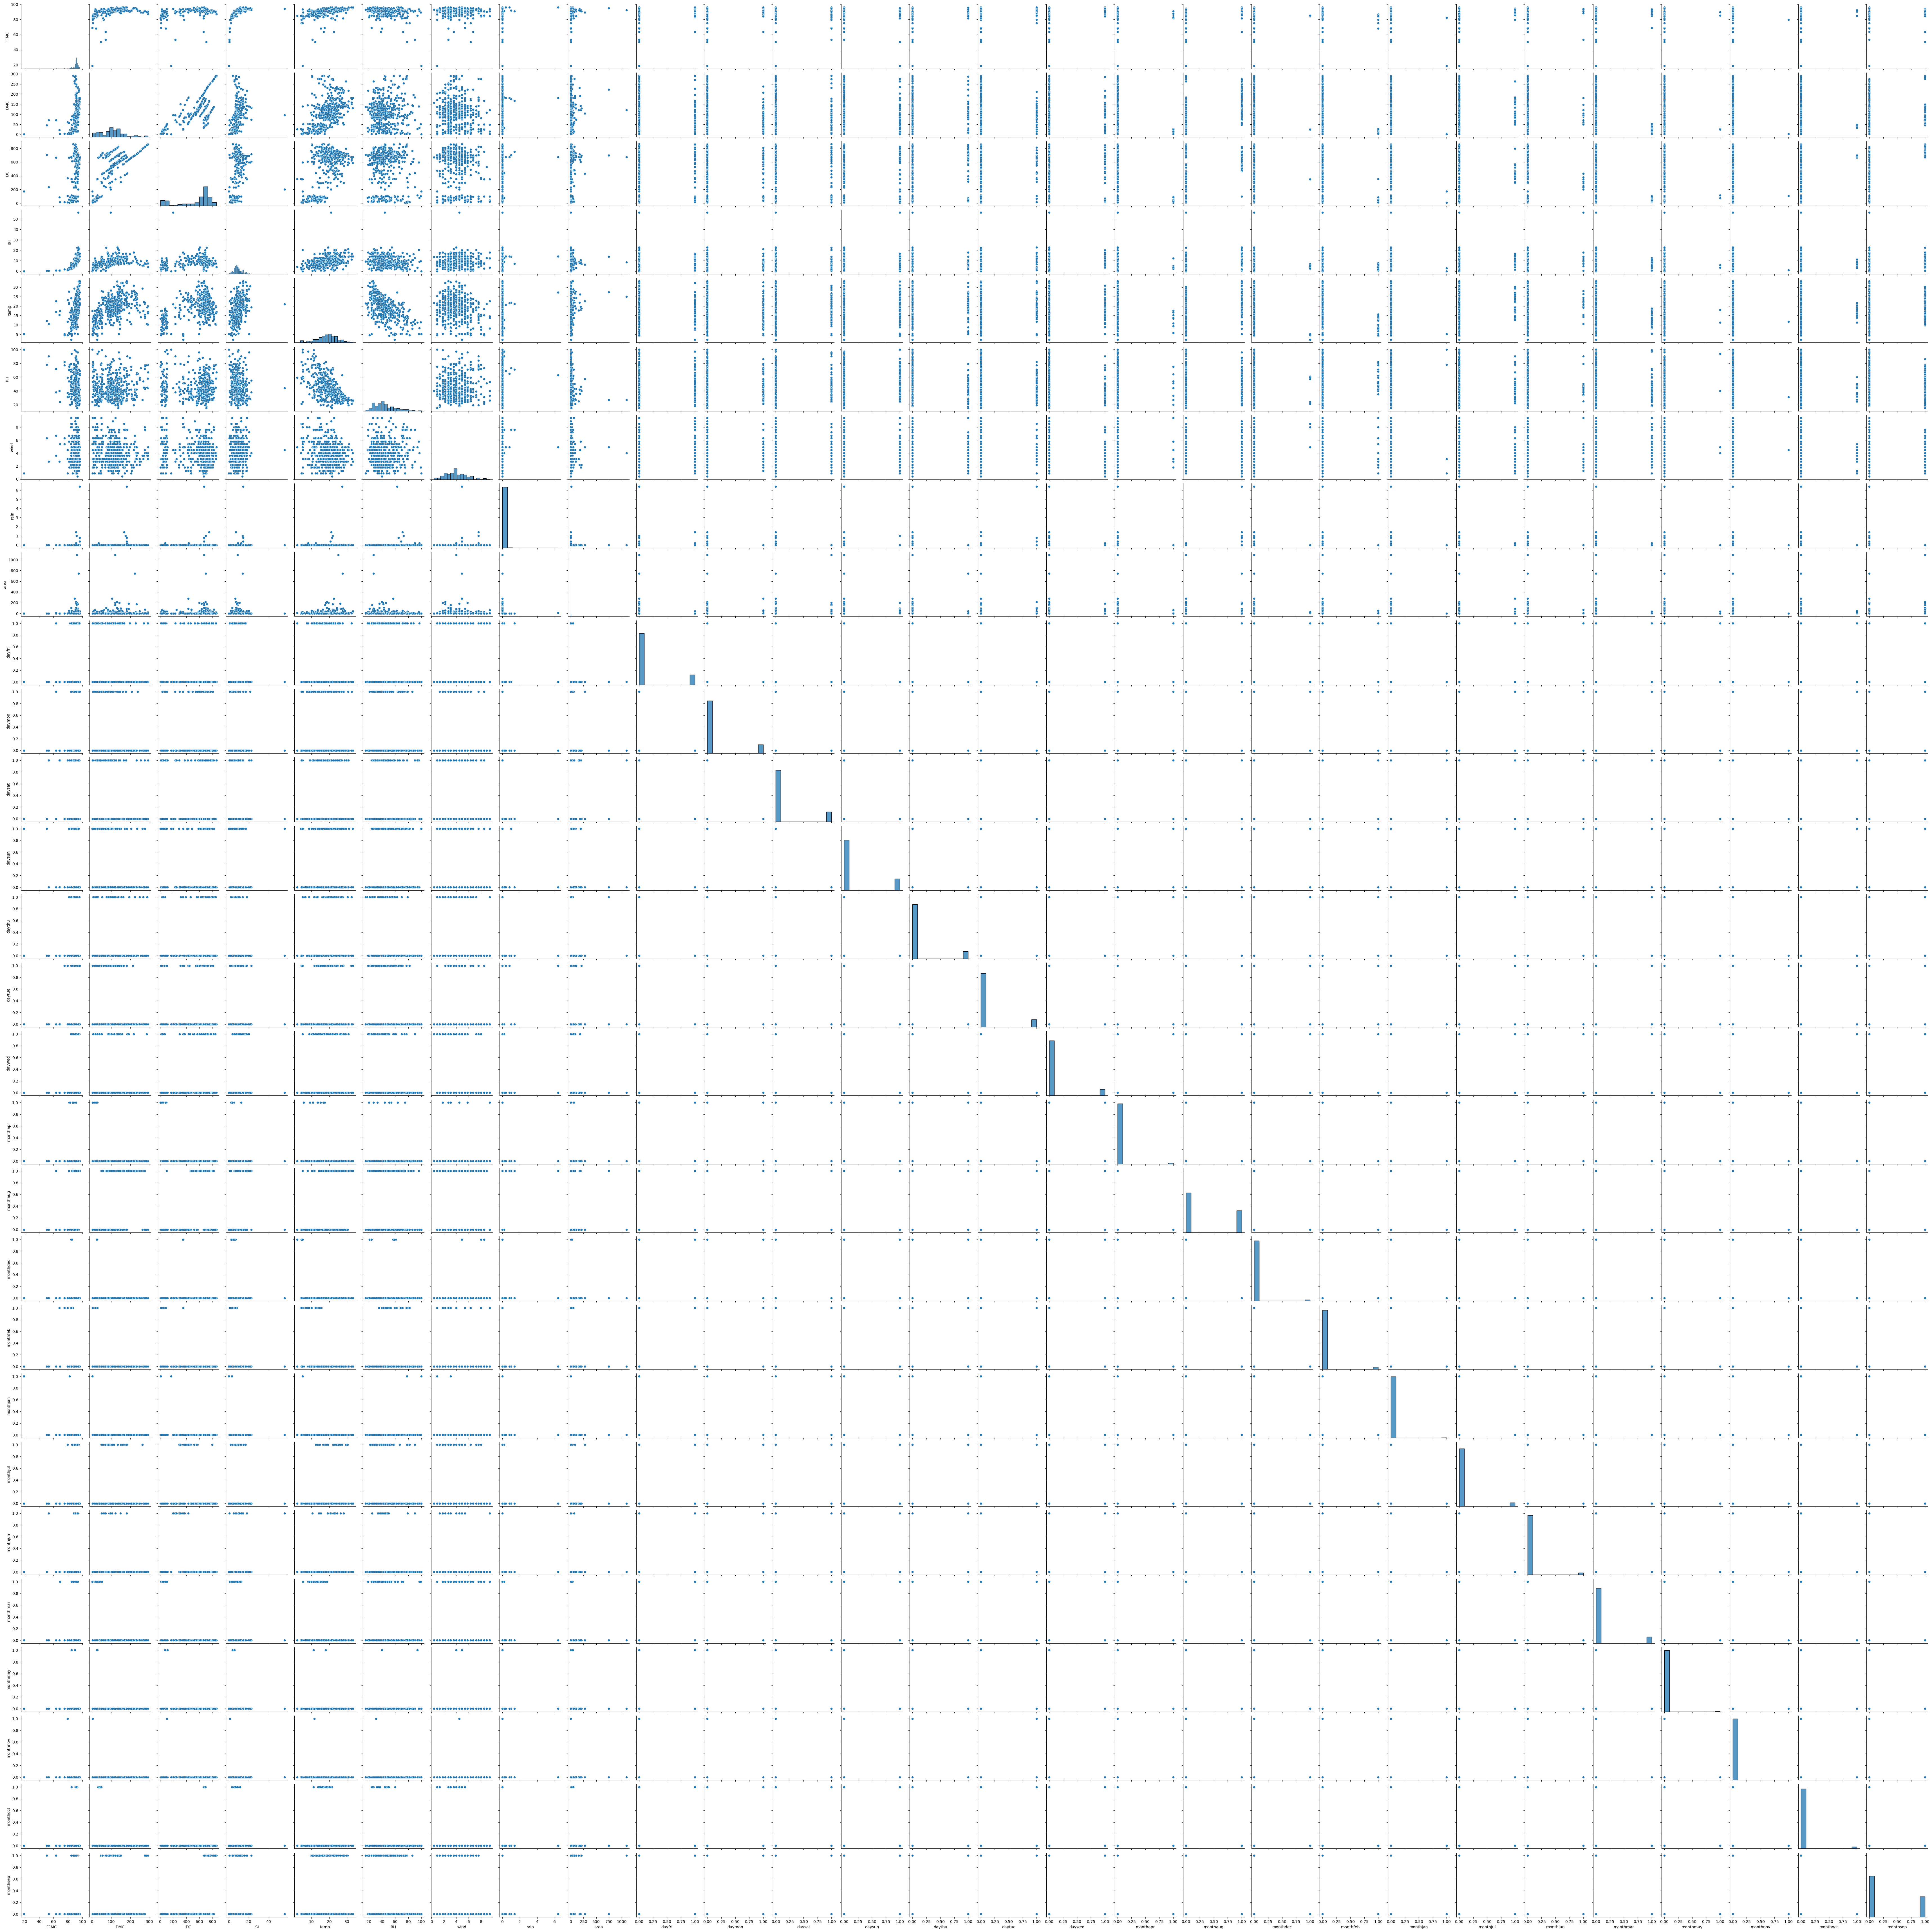

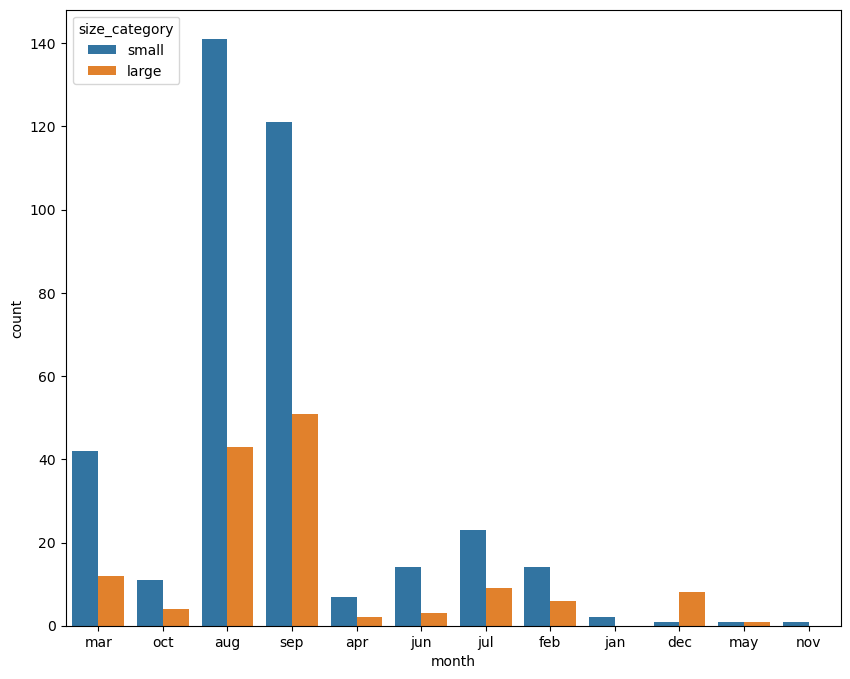

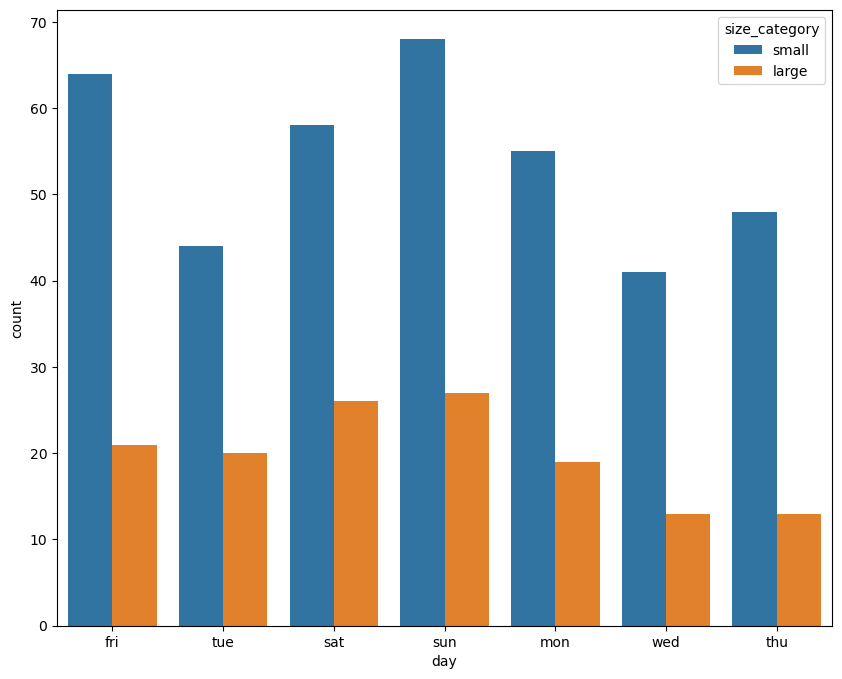

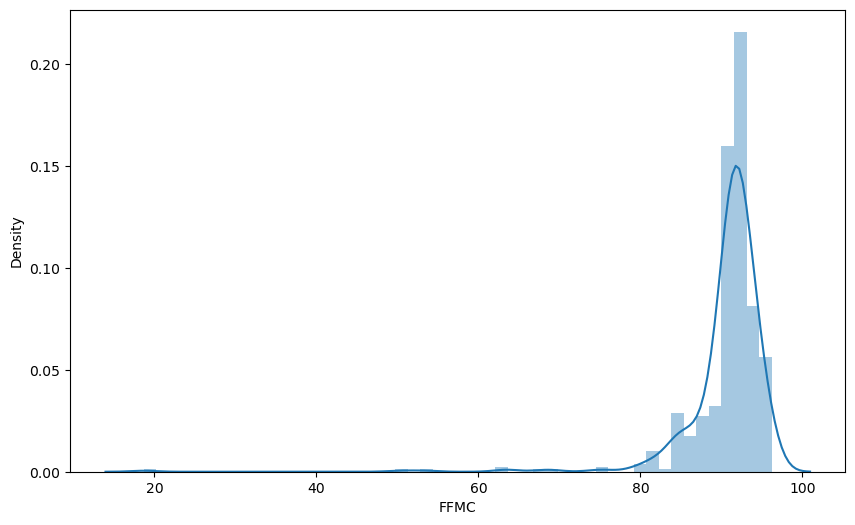

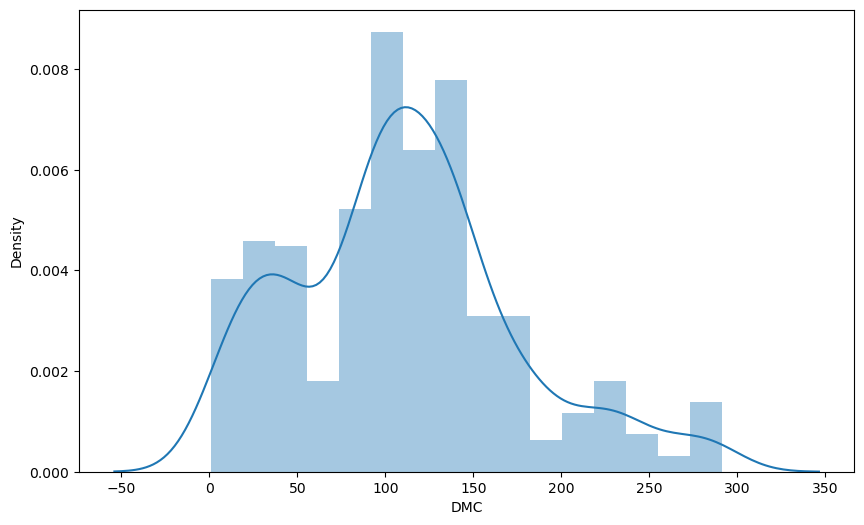

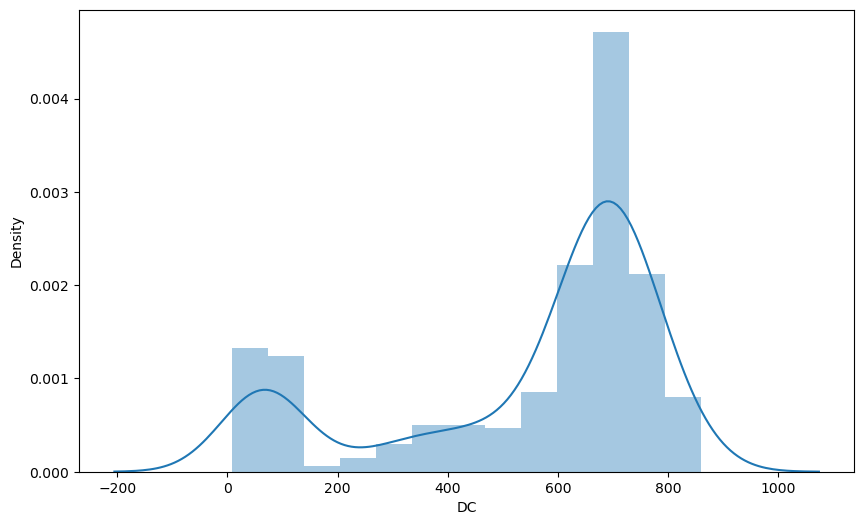

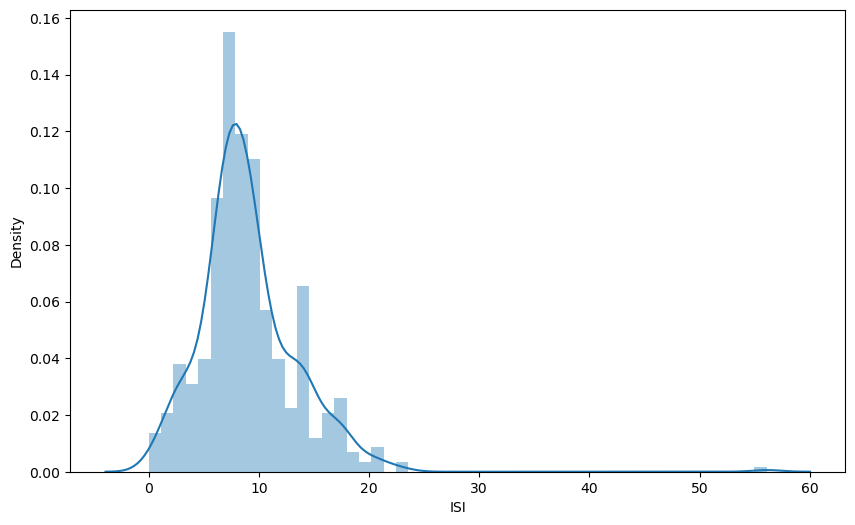

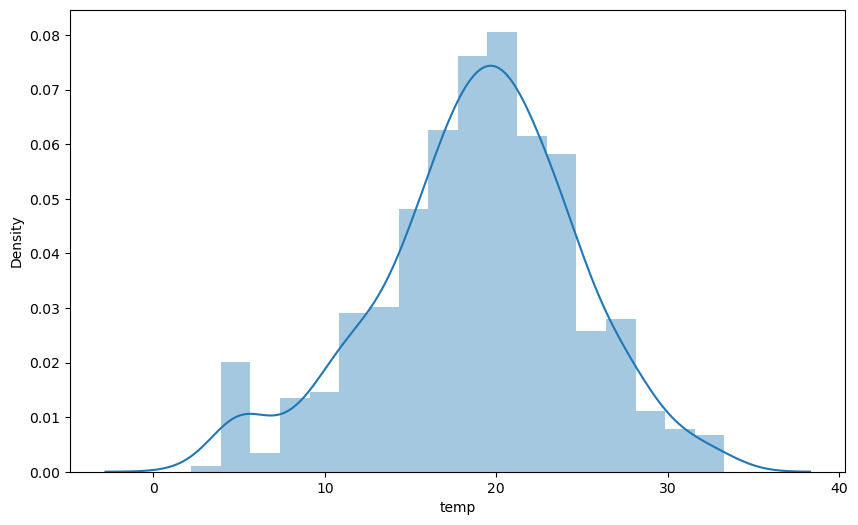

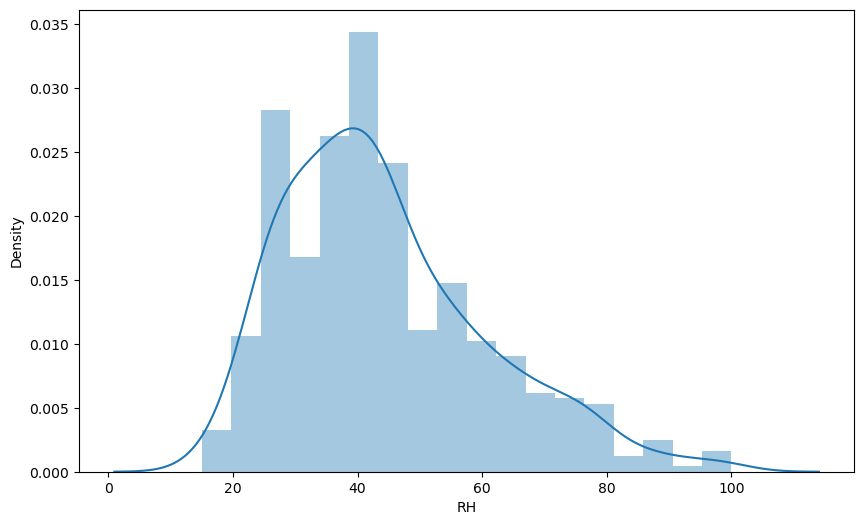

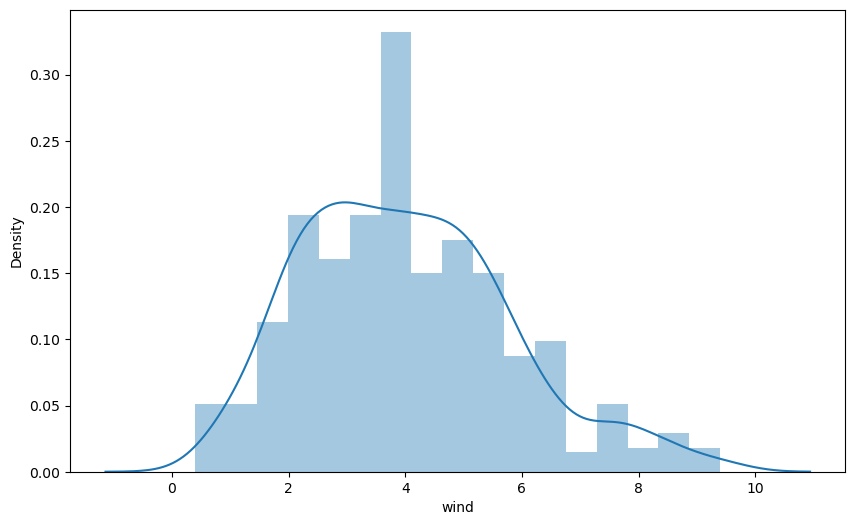

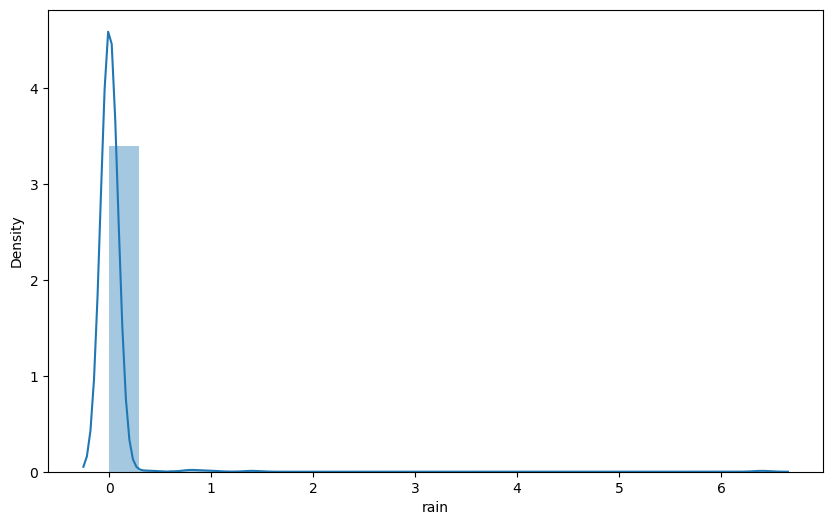

In [40]:
plt.figure(figsize=(10,8))
sns.countplot(x = data1['month'],hue=data1['size_category'])

plt.figure(figsize=(10,8))
sns.countplot(x = data1['day'],hue=data1['size_category'])

plt.figure(figsize=(10,6))
sns.distplot(data1['FFMC'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['DMC'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['DC'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['ISI'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['temp'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['RH'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['wind'],)

plt.figure(figsize=(10,6))
sns.distplot(data1['rain'],)


plt.show()

In [41]:
data2 = data1.drop(labels=['month','day'],axis =1)
data2

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data2['size_category'] = le.fit_transform(data2['size_category'])
data2

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [43]:
sns.countplot(data2['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='count'>

In [44]:
data2['size_category'].replace({'small':0,'large':0},inplace = True)

In [45]:
data2

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

In [46]:
corr=data.corr()
corr

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

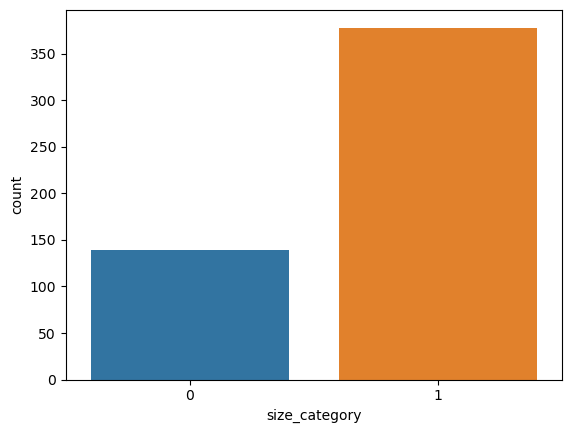

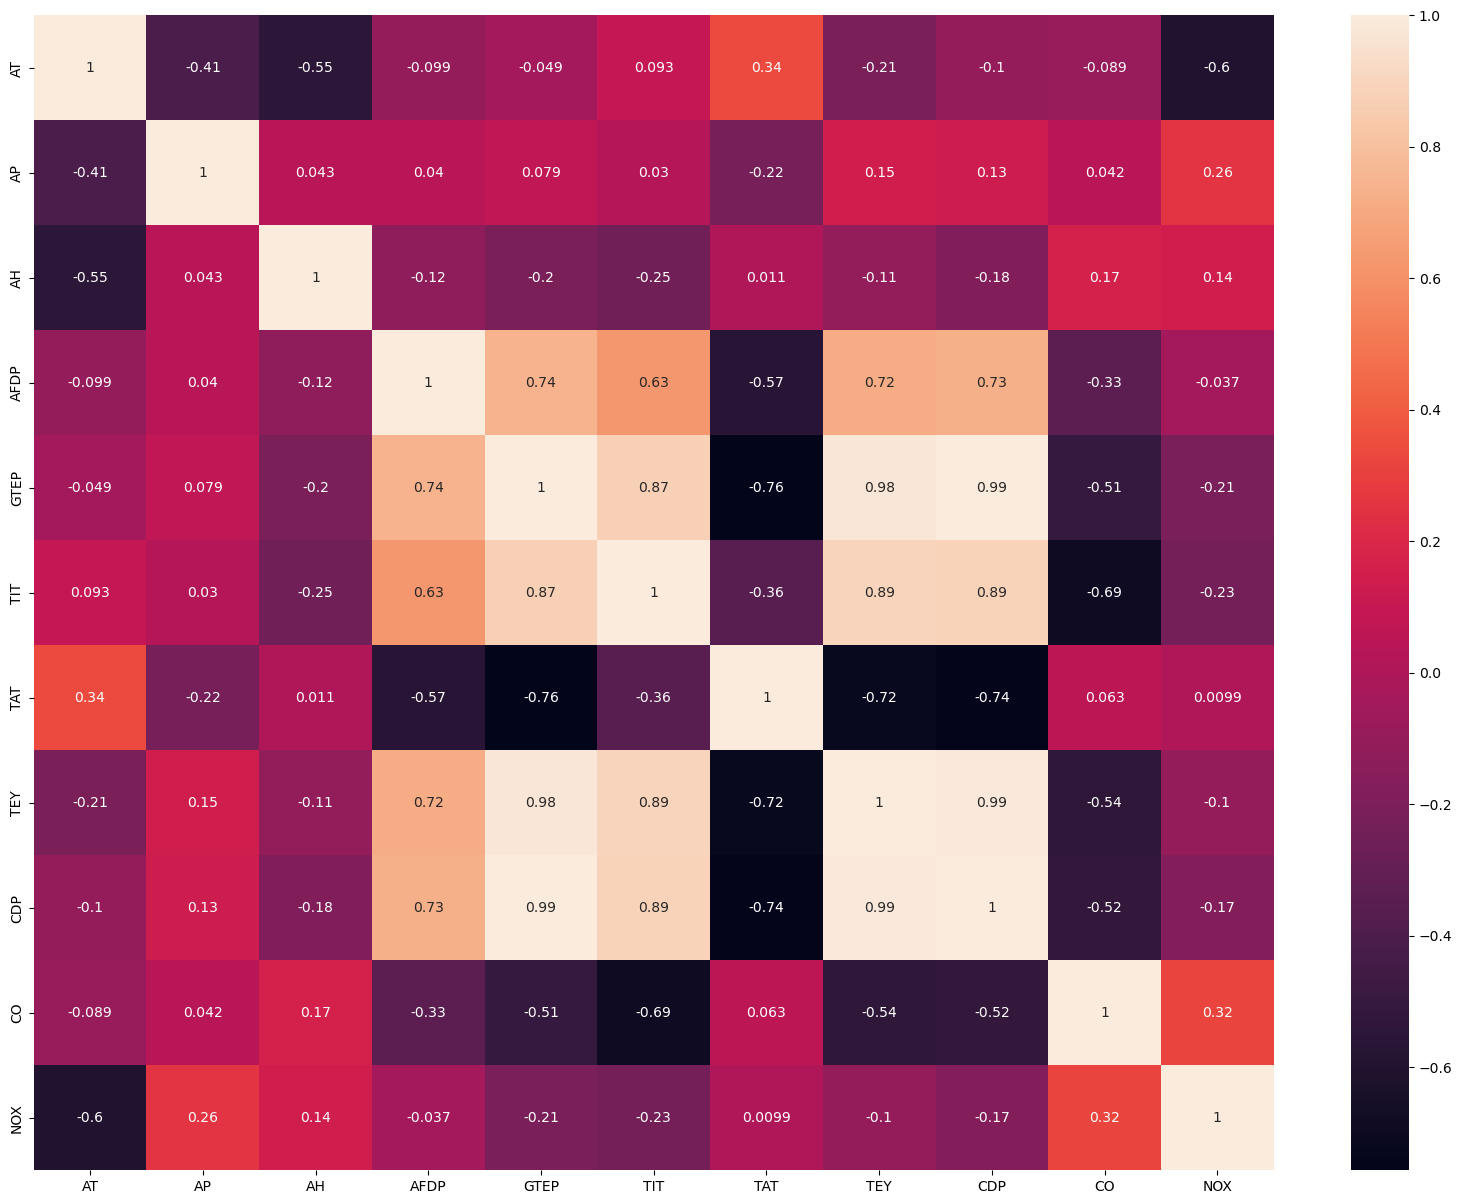

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show()

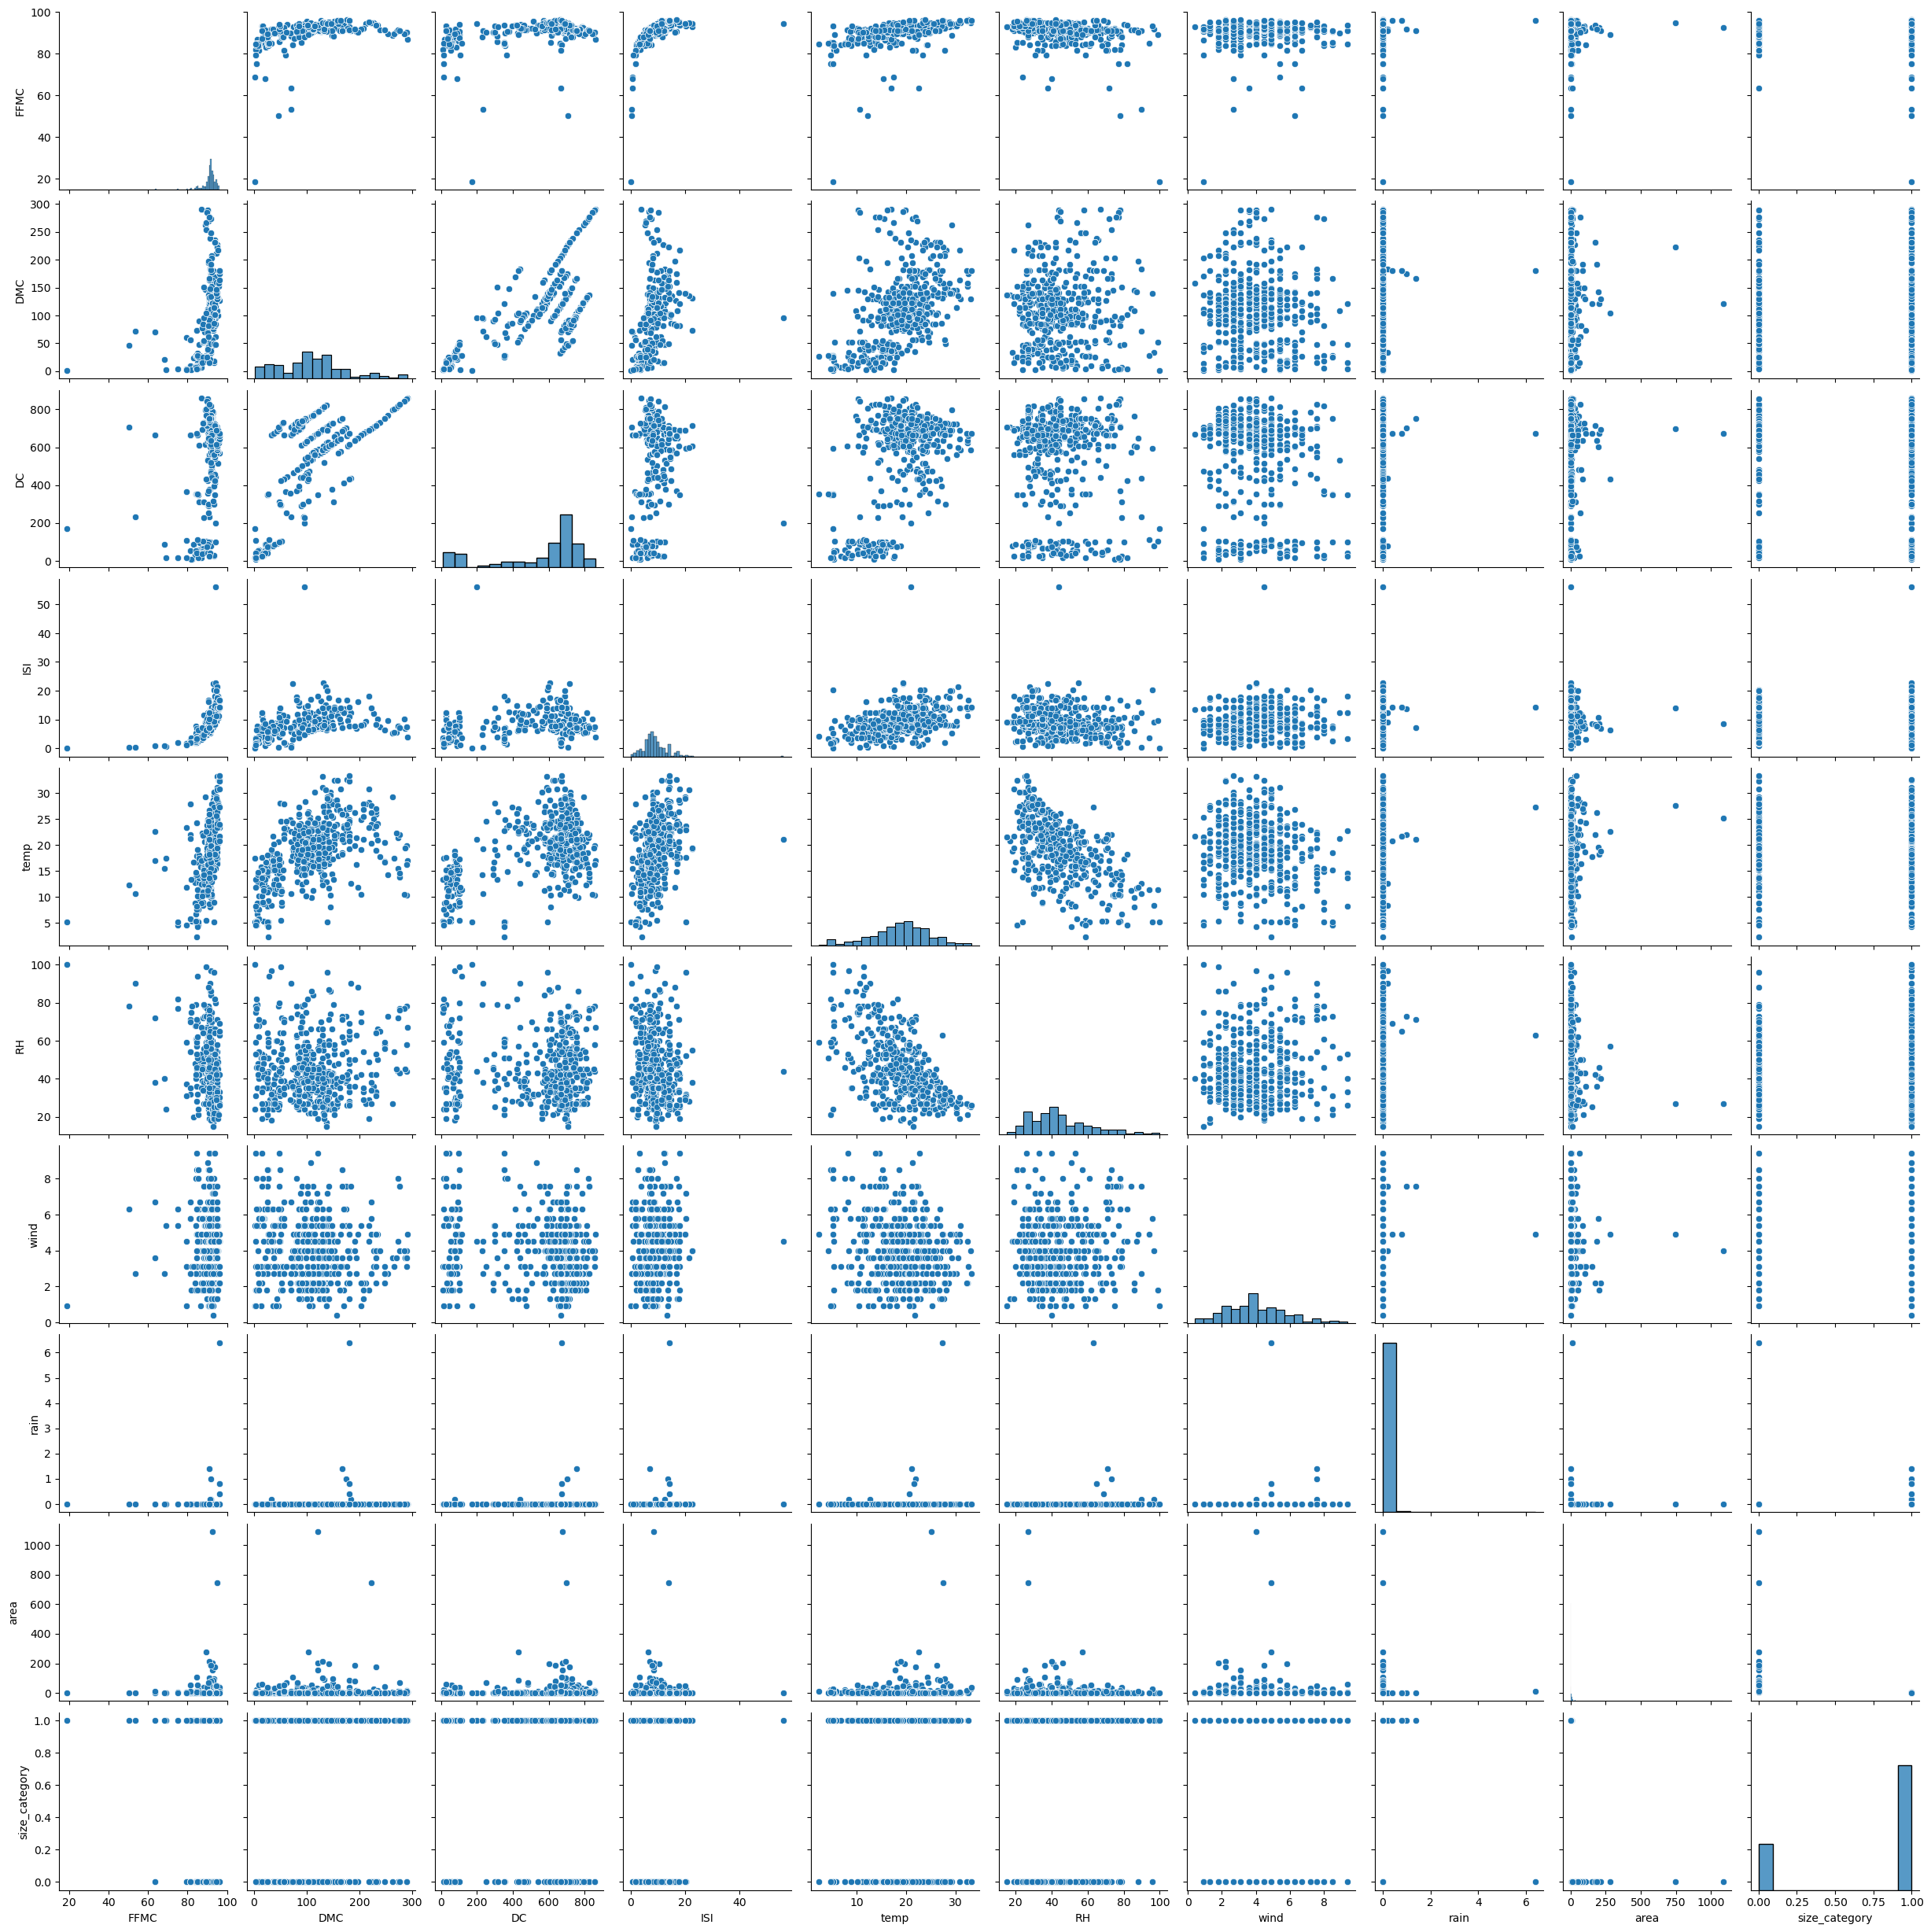

In [48]:
data3= pd.concat([data2.iloc[:,0:9],data2.iloc[:,-1]],axis = 1)
sns.pairplot(data3)
plt.show()

# Training Data

In [49]:
x,y = data2.drop(labels='size_category',axis = 1),data2[['size_category']]

In [50]:
x

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [51]:
y

size_category
0                1
1                1
2                1
3                1
4                1
..             ...
512              0
513              0
514              0
515              1
516              1

[517 rows x 1 columns]

In [52]:
mapping = {'small': 1, 'large': 2}

In [53]:
data1= data1.replace(mapping)

In [54]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [55]:
x_norm = norm_func(x)

In [56]:
x_train,x_test,y_train,y_test= train_test_split(x_norm,y, test_size=0.2,stratify = y)

In [57]:
x_train.shape,y_train.shape

((413, 28), (413, 1))

In [58]:
x_test.shape,y_test.shape

((104, 28), (104, 1))

# The network architecture

In [59]:
from keras import models
from keras import layers
import tensorflow as tf

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
# network.add(layers.Dense(10, activation='softmax'))

In [60]:
network.compile(optimizer='rmsprop',
loss=tf.keras.losses.CategoricalCrossentropy(),
metrics=['accuracy'])

In [61]:
network.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [62]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [63]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(         FFMC       DMC        DC       ISI      temp        RH      wind  \
 0    0.966452  0.806340  0.838748  0.180036  0.704180  0.411765  0.400000   
 1    0.922581  0.339421  0.730972  0.112299  0.598071  0.211765  0.255556   
 2    0.932903  0.948312  0.958368  0.126560  0.372990  0.729412  0.800000   
 3    0.967742  0.348380  0.636097  0.260250  0.639871  0.458824  0.800000   
 4    0.916129  0.306340  0.816817  0.085561  0.501608  0.576471  0.100000   
 ..        ...       ...       ...       ...       ...       ...       ...   
 599  0.889032  0.176085  0.112466  0.089127  0.282958  0.364706  0.600000   
 600  0.930949  0.419134  0.712084  0.153727  0.509249  0.403192  0.462145   
 601  0.888987  0.175907  0.112402  0.089107  0.282822  0.365062  0.600067   
 602  0.947285  0.340239  0.866678  0.171512  0.598422  0.237007  0.489079   
 603  0.973975  0.418968  0.682714  0.229331  0.425590  0.598773  0.398696   
 
      rain      area  dayfri  ...  monthdec  monthfeb  monthja

In [64]:
x_train_sm.shape,y_train_sm.shape

((604, 28), (604,))

In [65]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

In [66]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_train

array([[0.96645161, 0.80634045, 0.83733586, ..., 0.        , 0.        ,
        0.        ],
       [0.92258065, 0.33942109, 0.72861706, ..., 0.        , 0.        ,
        0.        ],
       [0.93290323, 0.94831151, 0.95800308, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.888987  , 0.17590748, 0.10463145, ..., 0.        , 0.        ,
        0.        ],
       [0.94728465, 0.3402386 , 0.86551075, ..., 0.        , 0.        ,
        1.        ],
       [0.97397483, 0.41896849, 0.67993683, ..., 0.        , 0.        ,
        0.        ]])

In [67]:
x_test = scale.fit_transform(x_test)
x_test

array([[0.69863014, 0.11356822, 0.0866426 , ..., 0.        , 0.        ,
        0.        ],
       [0.73287671, 0.33208396, 0.61707955, ..., 0.        , 0.        ,
        0.        ],
       [0.83561644, 0.36844078, 0.5613096 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.55479452, 0.30397301, 0.87937259, ..., 0.        , 0.        ,
        1.        ],
       [0.82191781, 0.51124438, 0.72986431, ..., 0.        , 0.        ,
        0.        ],
       [0.82191781, 0.54835082, 0.89717416, ..., 0.        , 0.        ,
        1.        ]])

# Fit the model

In [68]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [69]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

model = KerasClassifier(build_fn=creat_model,batch_size = 100,epochs = 10)
model.fit(x_train,y_train)

Epoch 1/10
7/7 [==============================] - 1s 3ms/step - loss: 0.6932 - accuracy: 0.4934
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5182
Epoch 3/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.5132
Epoch 4/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5414
Epoch 5/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5298
Epoch 6/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.5762
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5232
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5397
Epoch 9/10
7/7 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.5348
Epoch 10/10
7/7 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5298


# Evaluate the model

In [70]:
y_pred = model.predict(x_train)

19/19 [==============================] - 0s 2ms/step


In [71]:
test_acc1 =accuracy_score(y_train,y_pred)

In [72]:
print('test_acc:', test_acc1)

test_acc: 0.5397350993377483
